In [5]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import math
from statsmodels.sandbox.stats.multicomp import multipletests
sns.set(font_scale=1.3)
%matplotlib inline

In [7]:
sns.set_palette('Set2')

### Мыши

Возьмем для исследования следующий <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Он состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку.

Для исследования выберем столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N'.

In [54]:
df = pd.read_csv("./Data_Cortex_Nuclear.csv")

Посмотрим на первые строки этой таблицы.

In [55]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Выберем несколько столбцов для анализа значений в них.

In [56]:
columns = ['ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N']
df_chosen_columns = df[columns]

#### Гистограммы

Для каждого из выбранных признаков нарисуем гистограмму и посмотрим на распределение.

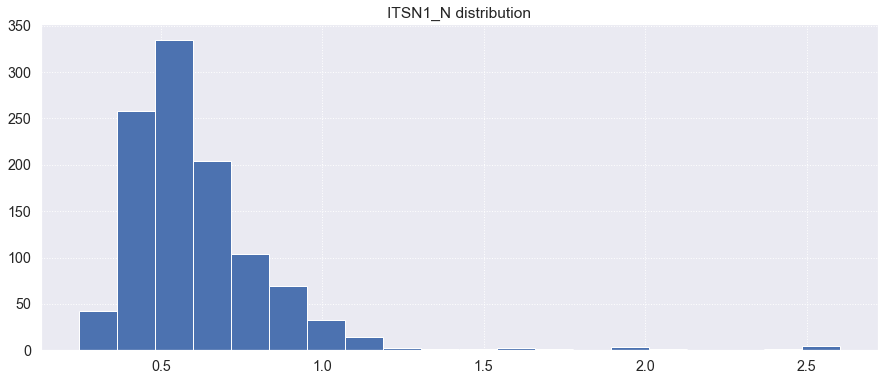

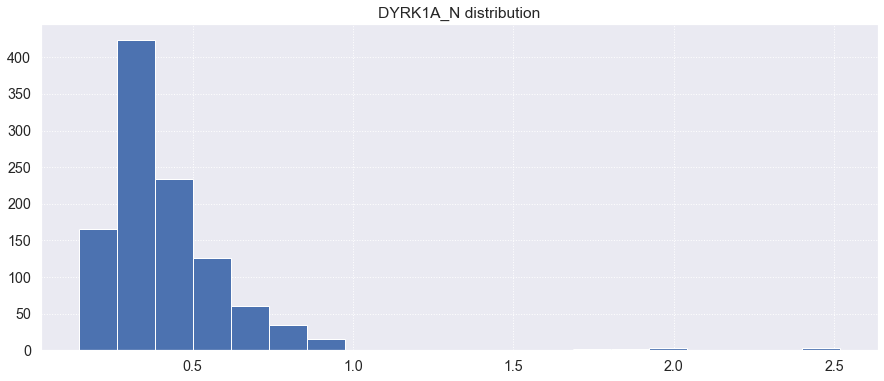

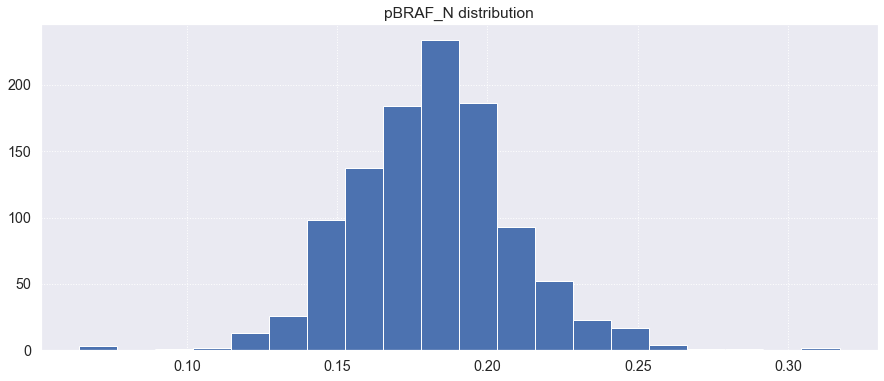

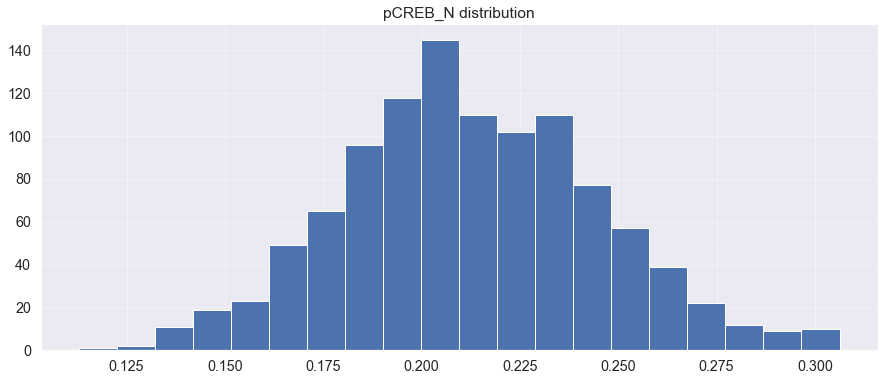

In [11]:
grid = np.linspace(0, 1, 5000)
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    plt.hist(x = df_chosen_columns[column], color = 'b', bins=20)
    plt.grid(ls = ':')
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

В нашем случае точечные выбросы можно наблюдать на первых трех гистограммах('ITSN1_N', 'DYRK1A_N', 'pBRAF_N')

Заметим, что выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на следующем примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму.

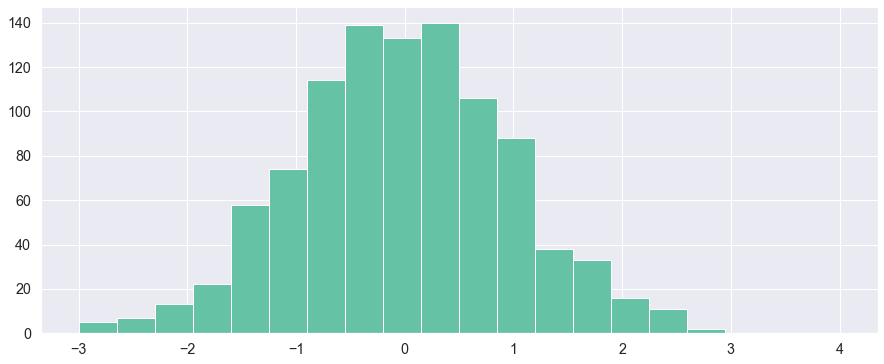

In [12]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

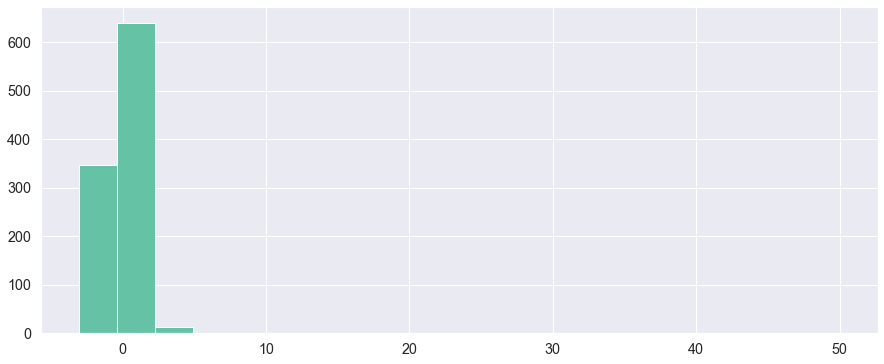

In [13]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.

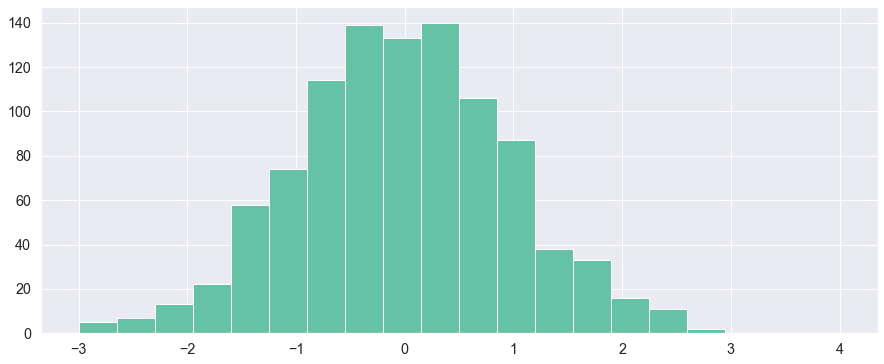

In [14]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделаем то же самое с теми столбцам, в которых, как мы выяснили, есть выбросы.

В словаре `ranges_without_outliers` укажем, в каких пределах, мы будем рисовать гистограмму распределения для каждого признака.

Интервалы для исследуемых признаков:

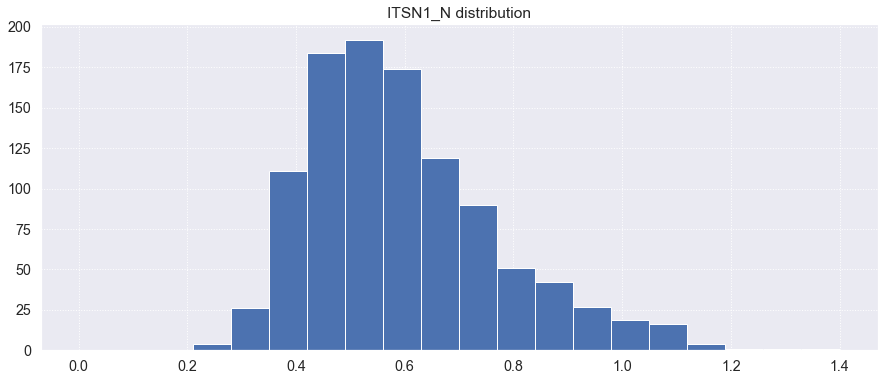

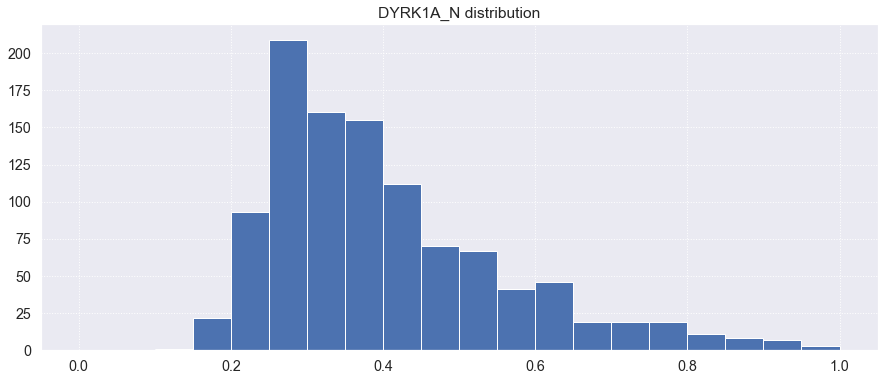

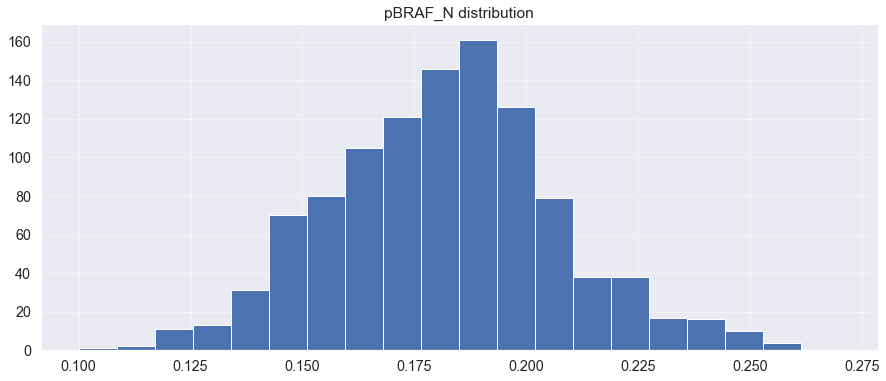

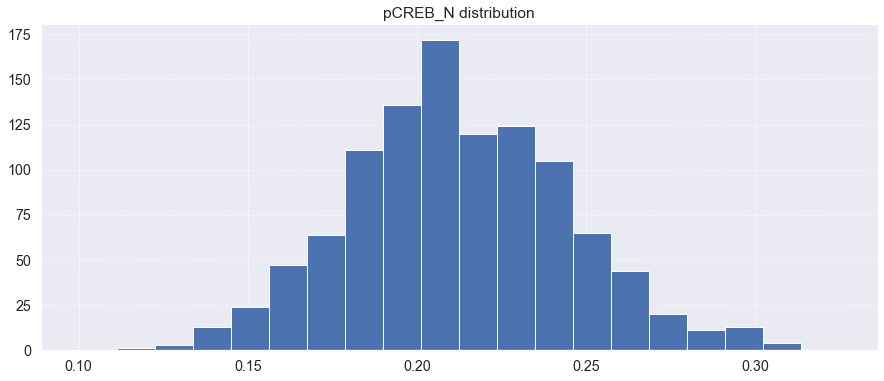

In [16]:
ranges_without_outliers = {
    'ITSN1_N' : (0, 1.4),
    'DYRK1A_N' : (0, 1),
    'pBRAF_N' : (0.1, 0.27),
    'pCREB_N' : (0.1, 0.325),   
}


grid = np.linspace(0, 5, 5000)
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(x = df_chosen_columns[column], range=column_range, color = 'b', bins=20)
    plt.grid(ls = ':')
    plt.title(column + ' distribution')

**Выводы** 

Графики стали информативнее, просто потому что в них проще увидеть стандартные распределения, их стало легче анализировать.

#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях стоит использовать ядерные оценки плотности. 

Пример для нормального распределения с выбросом.

c:\users\егор\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


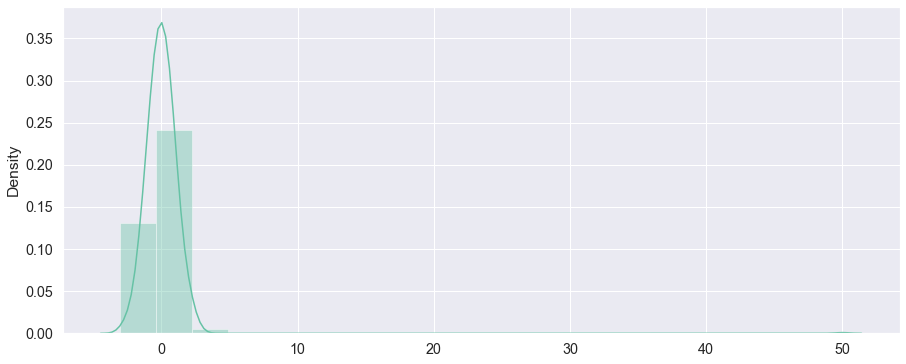

In [18]:
plt.figure(figsize=(15, 6))
sns.distplot(sample, bins=20);

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения.

c:\users\егор\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


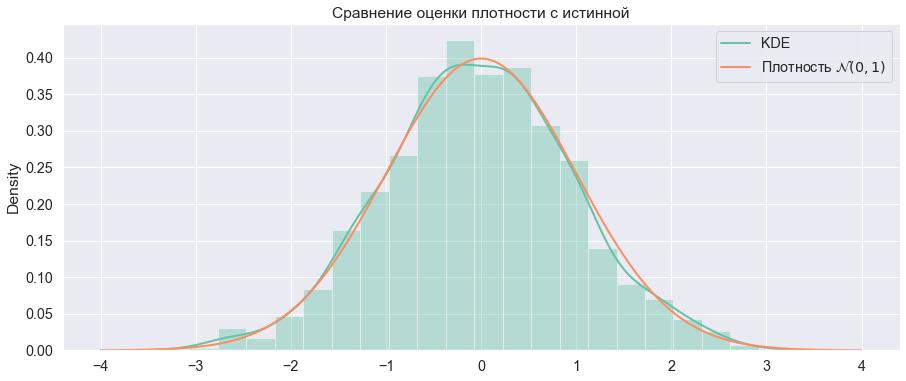

In [19]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample_wo_ourliers, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируем выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$.

In [51]:
data = sps.expon.rvs(size = 100)

Нарисуем гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

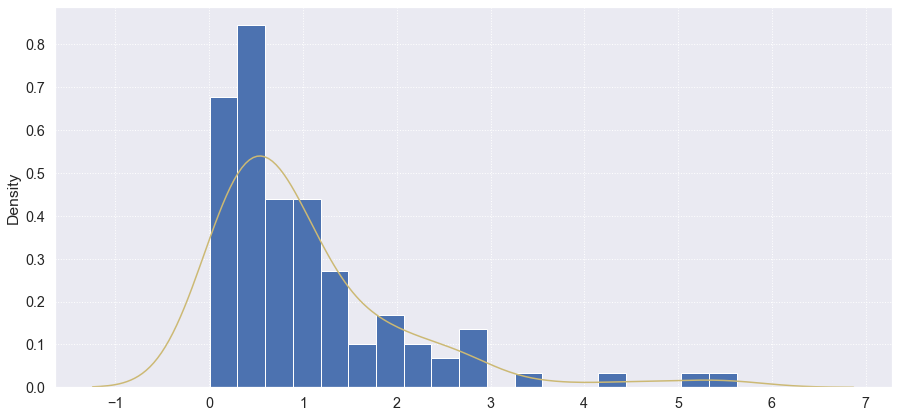

In [21]:
grid = np.linspace(0, 5, 1000)
plt.figure(figsize = (15, 7))
plt.hist(x = data, color = 'b', density = True, bins=19)
plt.grid(ls = ":")
sns.kdeplot(data, color = 'y')

Видим, что ядерная оценка плотности плохо приближает реальную плотность распределения.
Это происходит потому, что экспоненциальное распределения не является симметричным, поэтому когда мы используем ядерную оценку плотности, приближая тем самым эксп. распределение нормальным, мы получаем плохую оценку(это видно, на построенном графике, я решил не обрезать отрицательную полуось). Для наглядности мысли сгенерировал выборку для нормального распределения, на которой ядерная оценка плотности работает гораздо лучше.

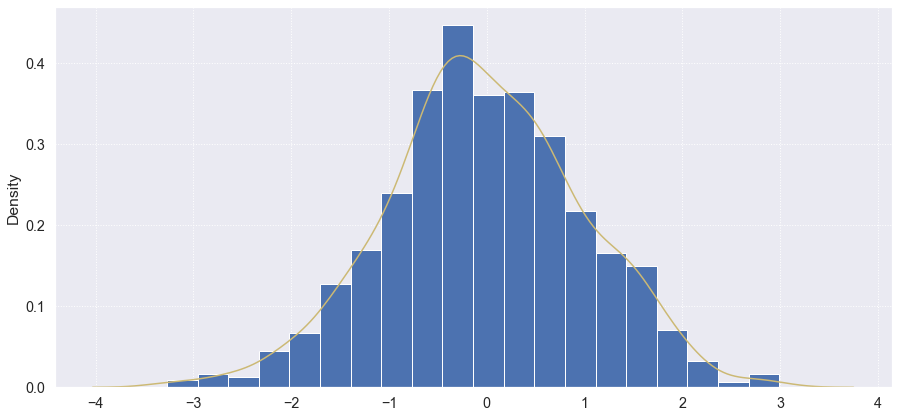

In [22]:
data_pois = sps.norm.rvs(size = 1000)
grid = np.linspace(-5, 5, 1000)
plt.figure(figsize = (15, 7))
plt.hist(x = data_pois, color = 'b', density = True, bins=20)
plt.grid(ls = ":")
sns.kdeplot(data_pois, color = 'y')

Нарисуем гистограммы и ядерные оценки плотности для исследуемых признаков.

<Figure size 1080x432 with 0 Axes>

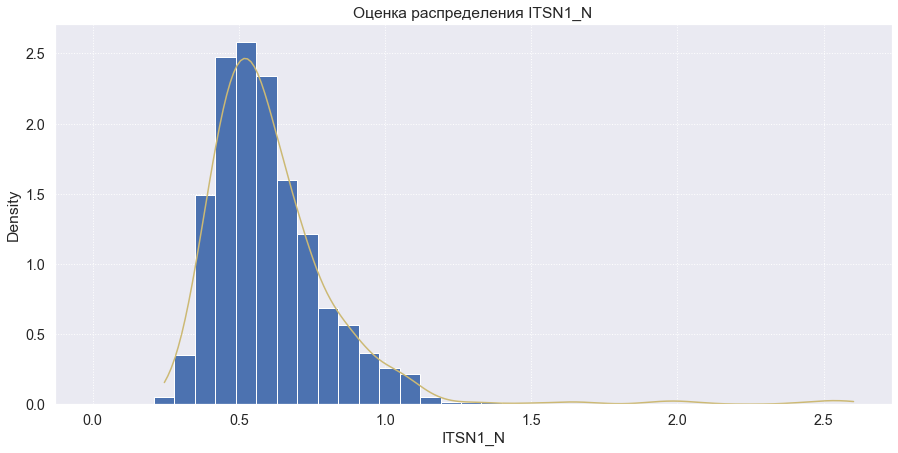

<Figure size 1080x432 with 0 Axes>

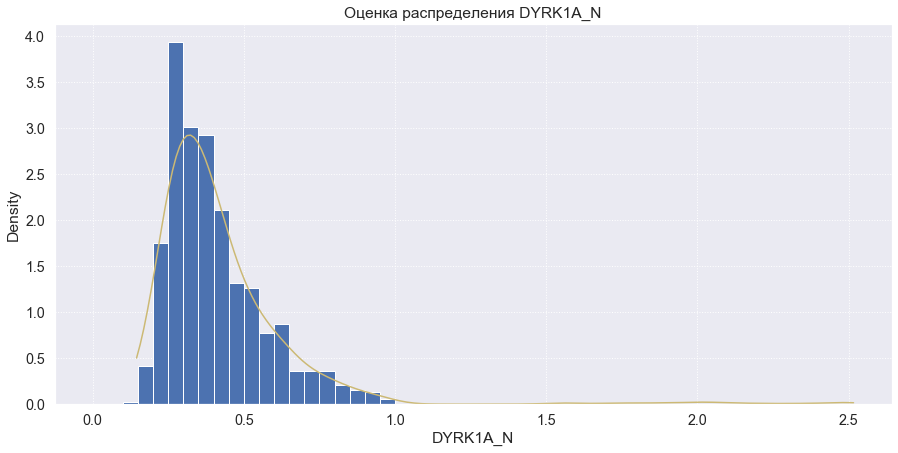

<Figure size 1080x432 with 0 Axes>

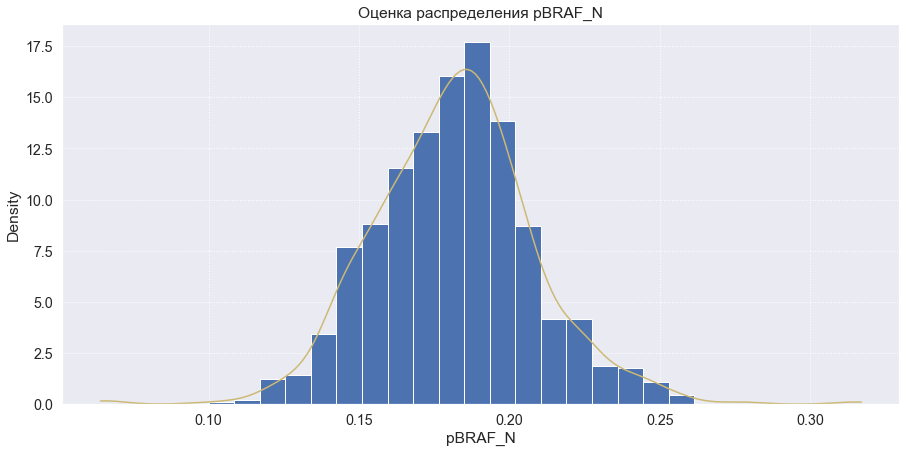

<Figure size 1080x432 with 0 Axes>

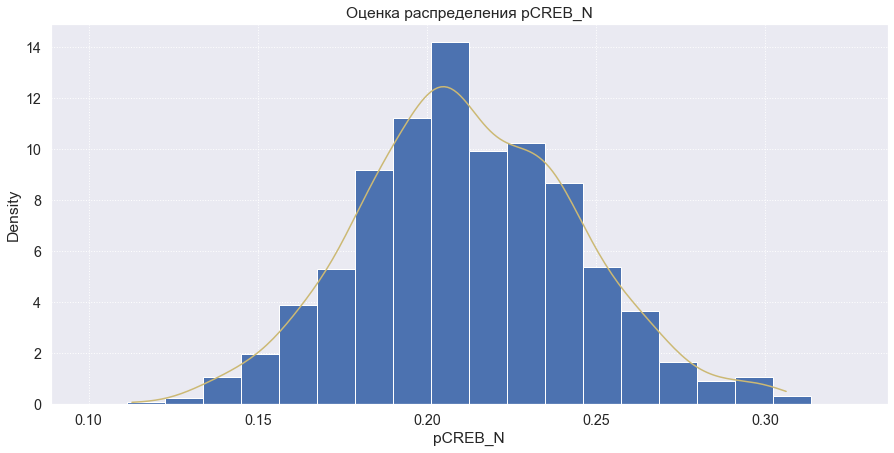

In [26]:
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    grid = np.linspace(0, 5, 1000)
    plt.figure(figsize = (15, 7))
    plt.hist(x = df_chosen_columns[column], range=column_range, density = True, color = 'b', bins=20)
    plt.grid(ls = ":")
    sns.kdeplot(df_chosen_columns[column], cut = 0, color = 'y')
    plt.title('Оценка распределения ' + column)

**Вывод:** В данном случае ядерная оценка плотности демонстрирует более наглядные результаты, но только потому, что исследуемые распределения похожи на нормальные, судя по гистограммам. Как я уже говорил выше при описании неточности результатов для экспоненциального распределения, важным фактором для нормальной работы ядерной оценки плотности служит именно симметричность исследуемого распределения(данный фактор можно будет идентифицировать с помощью предварительного построения той же гистограммы). 

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.

**Примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:
Не нужно удалять выбросы в том случае, когда они являются ключевым объектом исследования(сфера банковского мошенничества, какие либо аномальные списания сумм средств со счетов клиентов за очень короткий срок как раз будут выбросами по сравнению с обыденными операциями подавляющего большинства клиентов. Как только такой выброс будет задетектирован, в ход сразу же вступает служба безопасности. Еще один пример. Предположим мы исследуем активность активность веществ, которые потенциально обладают свойствами антибиотиков. Предположим, что при воздействии на патогены мы будем детектировать изменение электрохим потенциала клетки. В ожидаемом исходе с патогеном ничего не случится, и мы сможем отбросить это вещество как антибиотик. Однако здесь опять таки будут полезны выбросы, тк при взаимодействии антибиотика с патогеном тормозить возникновение электрохим потенциала путем уничтожения мембраны патогена. Такие выбросы опять таки будут полезны нам для детектирования нужных веществ.

Где нужно удалять выбросы: в исследованиях, где мы заведомо знаем, что значительную погрешность в методику будет вносить оборудование и именно из-за него мы детектируем аномальные отклонения от данных. Опять таки пример из экономики. Предположим нам нужно спрогнозировать продажи на следующий месяц. Вы обращаетесь к данным за тот же месяц прошлого года для построения корректного прогноза и вдруг замечаете аномальный выброс, который никоим образом нельзя учитывать в прогнозе(пусть у вас компания по продаже питьевой воды и в прошлом июне проходил разовый марафон, который никогда больше проходить в июне не будет, вследствие чего ваши продажи в конкретный день проведения марафона сильно возросли, однако если мы будем учитывать продажи в этот день, то выборка для прогноза будет неинформативной, просто потому что появление очередного такого события будет очень сложно спрогнозировать.

**Выводы:** В ходе задачи удалось познакомиться с программным аппаратом, который, как я понял, будет преследовать нас на протяжении всего курса. Немного пощупал выбросы данных, реализовал один из привитивных способов избавления от них путем редактирования рассматриваемого интервала(повторюсь выбросы это не так плохо, всегда надо смотреть контекст исследования и разбираться, почему они вообще возникли). Нашел(хоть по моему мнению и не все, однако в данном случае можно было говорить именно про симметричность, тк задача была подстроена именно под это, тк исследовал нормальные распределения экспрессии генов и сгенерированное экспоненциальное распределение) границы применимости ядерной оценки плотности, которая, опять таки является достойным способом анализа исследуемой статистики. 


Далее посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируем данные в первых десяти колонках в двумерных проекциях.

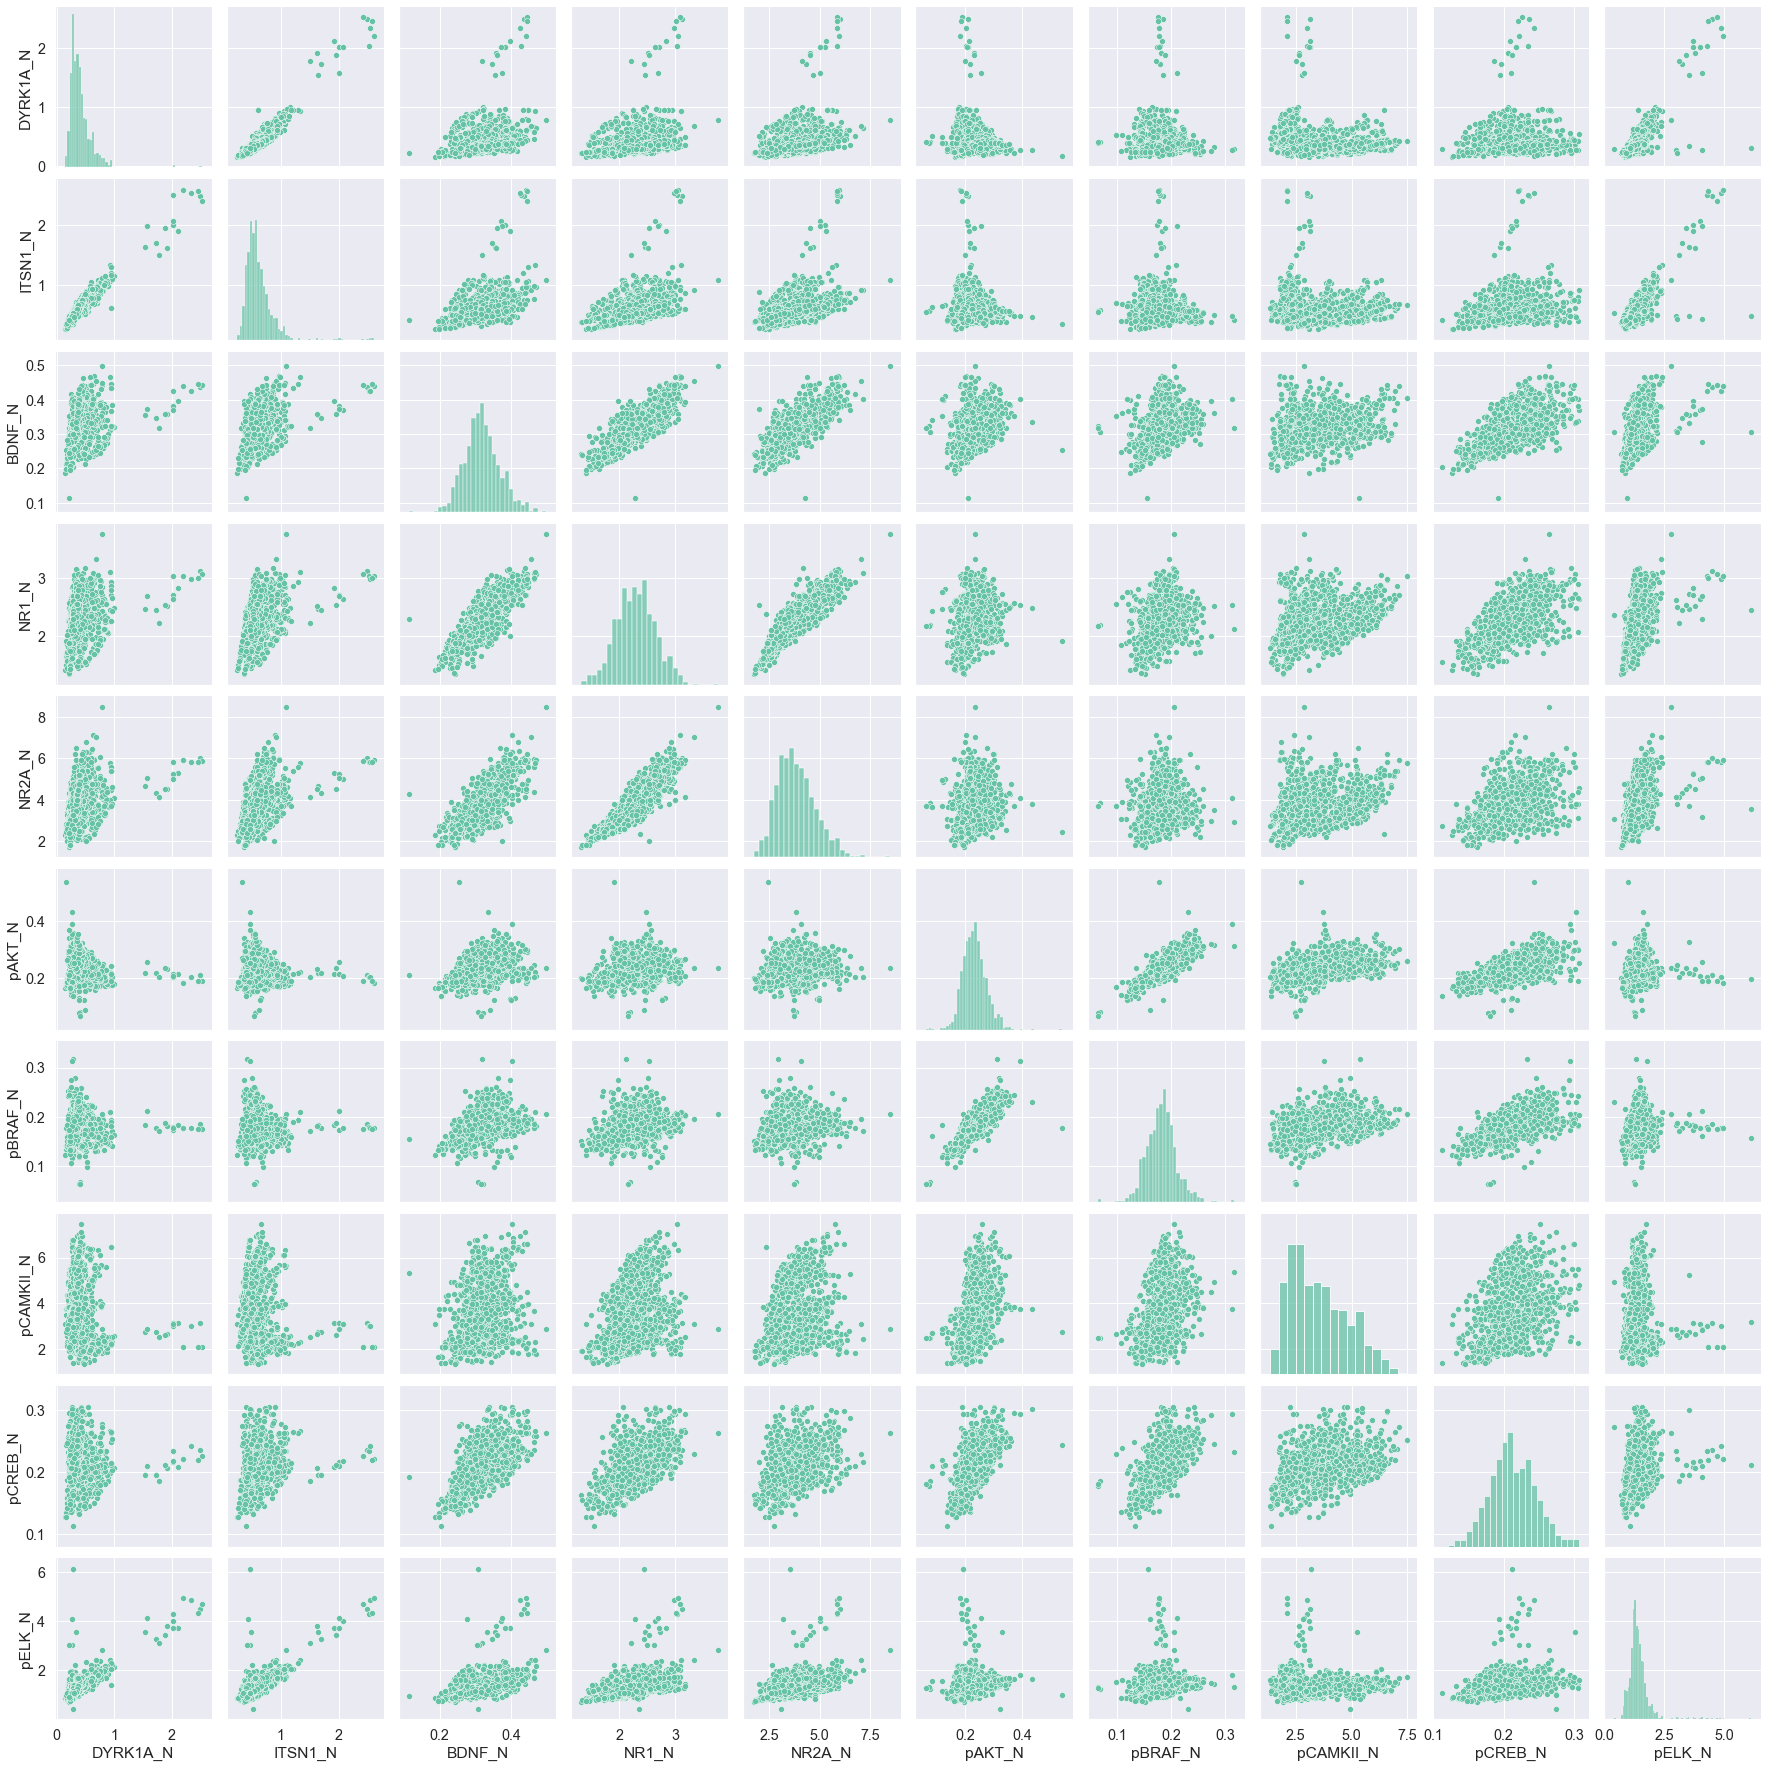

In [28]:
columns = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N']
data_columns = df[columns]
sns.pairplot(data_columns)

Построим ядерные оценки плотности:

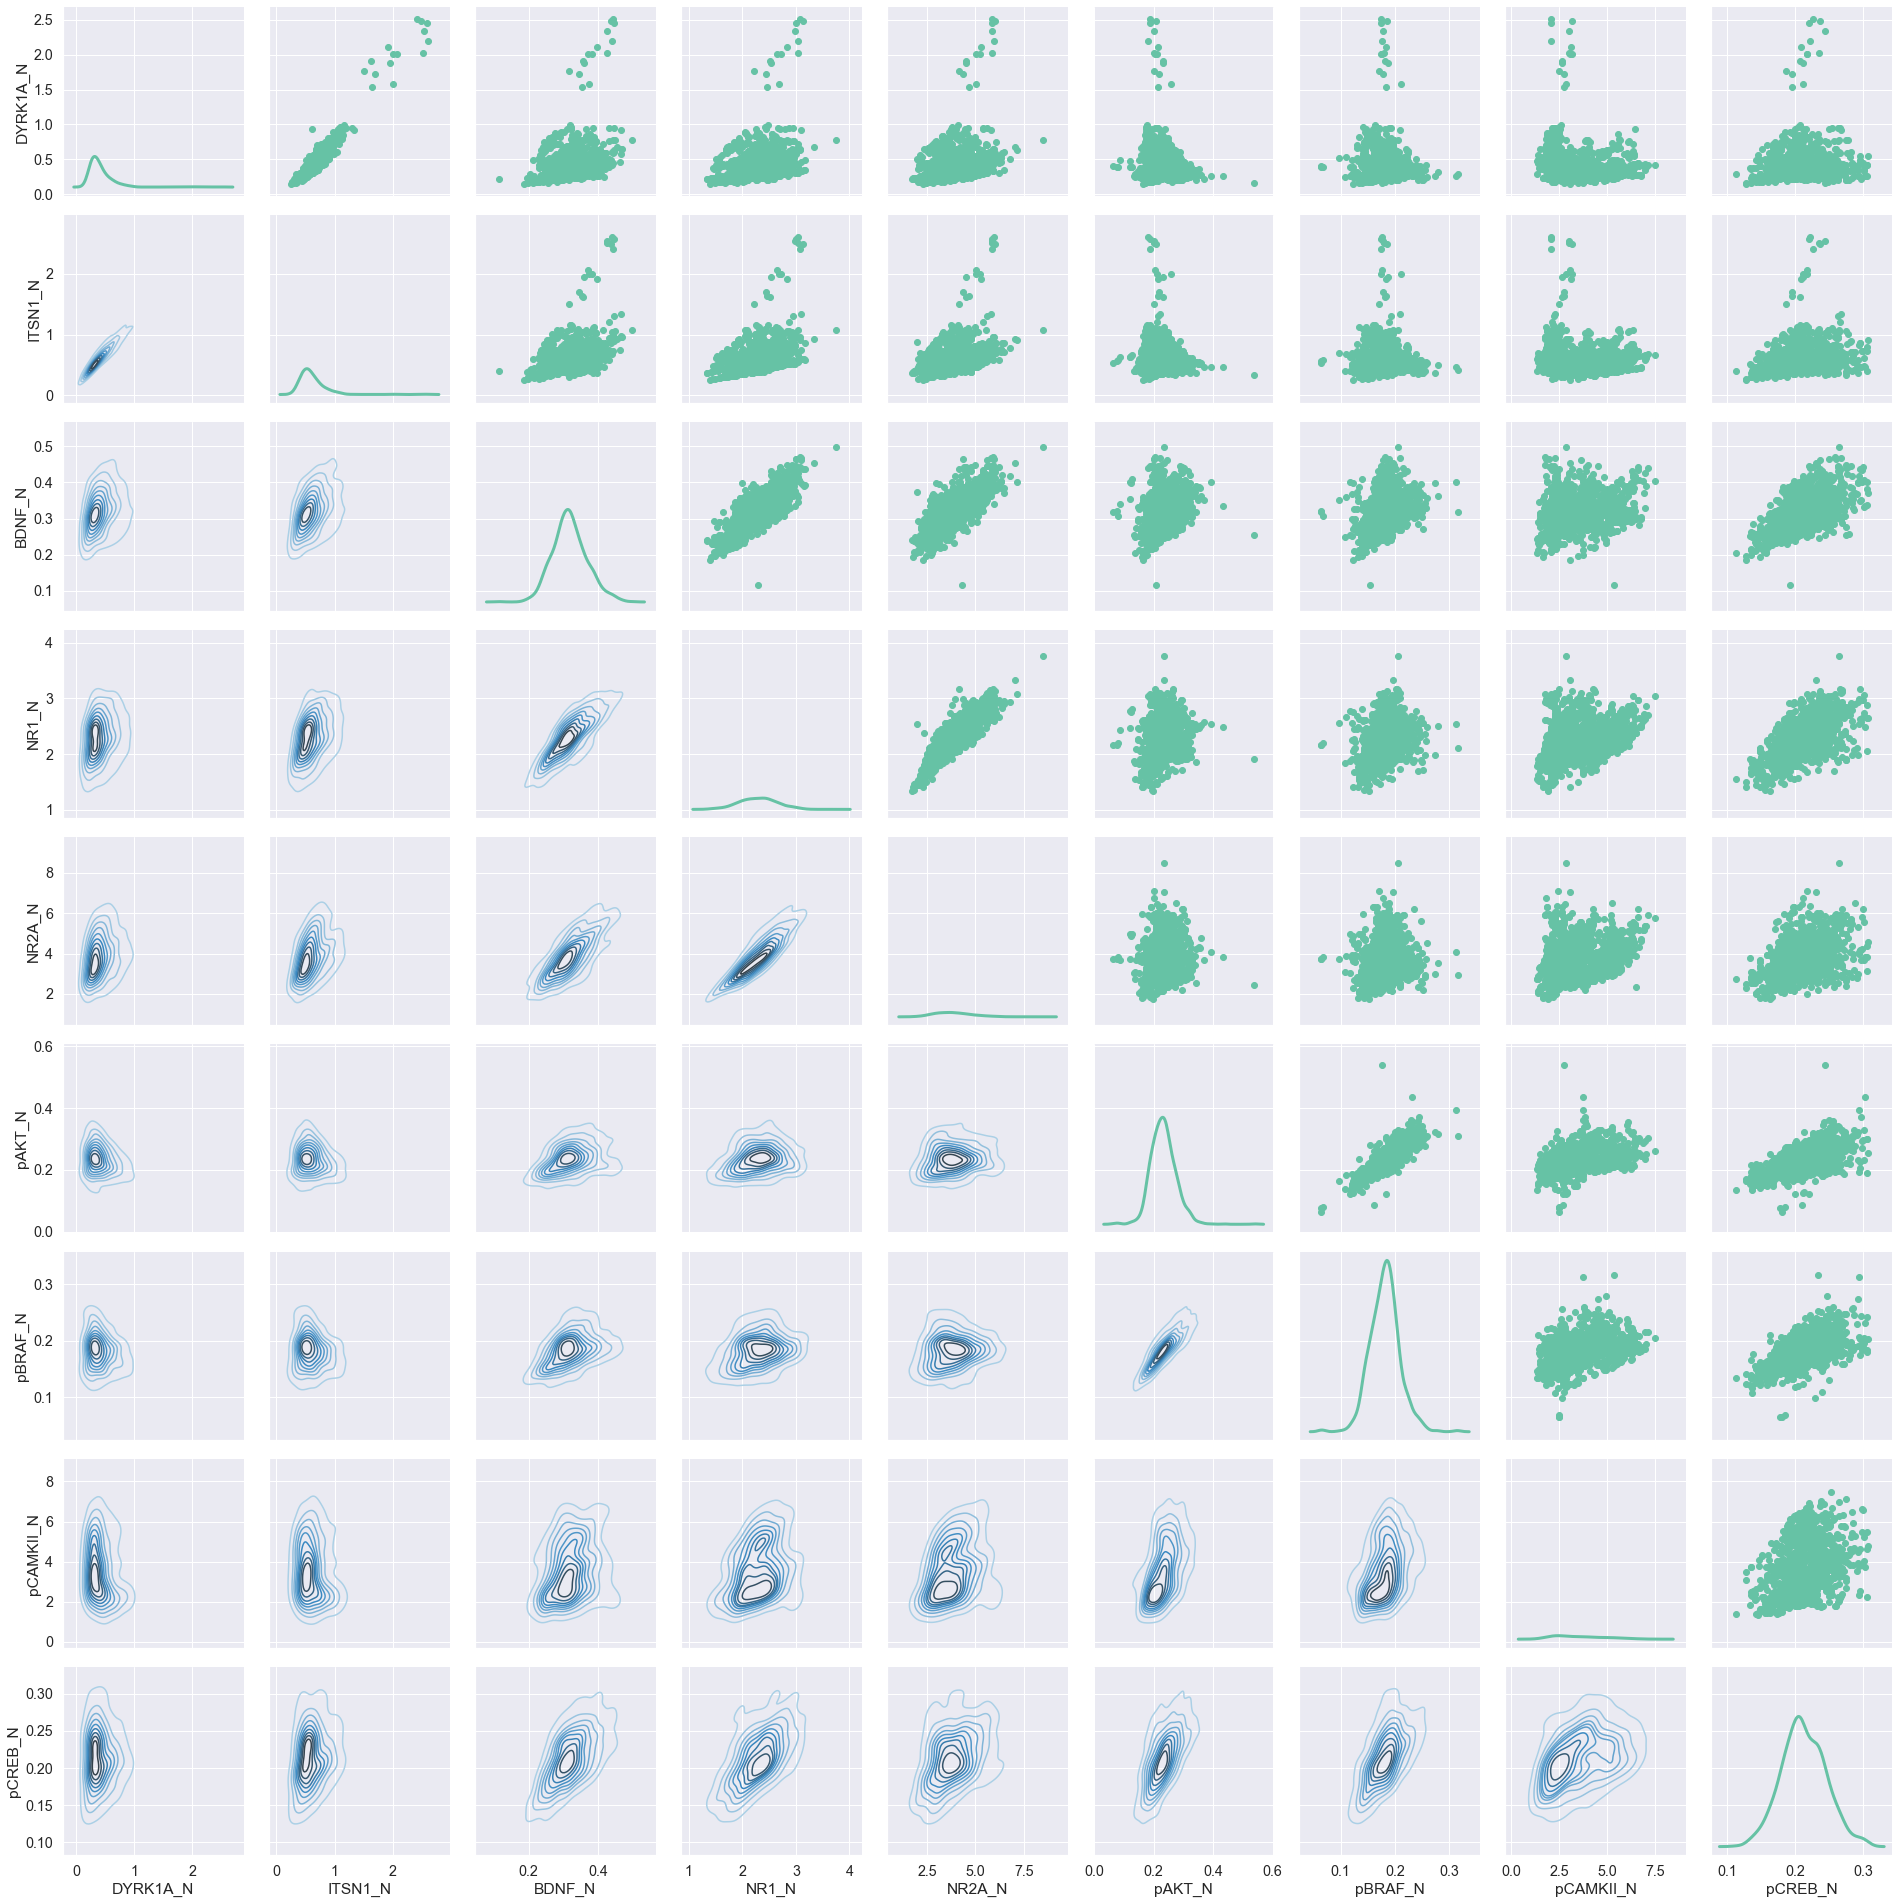

In [30]:
g = sns.PairGrid(df.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Посчитаем корреляционную матрицу признаков, соответствующих белкам с помощью `sns.heatmap`, также выведем значения коэффициентов корреляции в ячейках матрицы сначала для первых 15 признаков. Сравним корреляционные матрицы, полученные  с использованием трех коэффициентов корреляции. Далее сделаем то же самое для всех признаков с использованием коэффициента Спирмена.

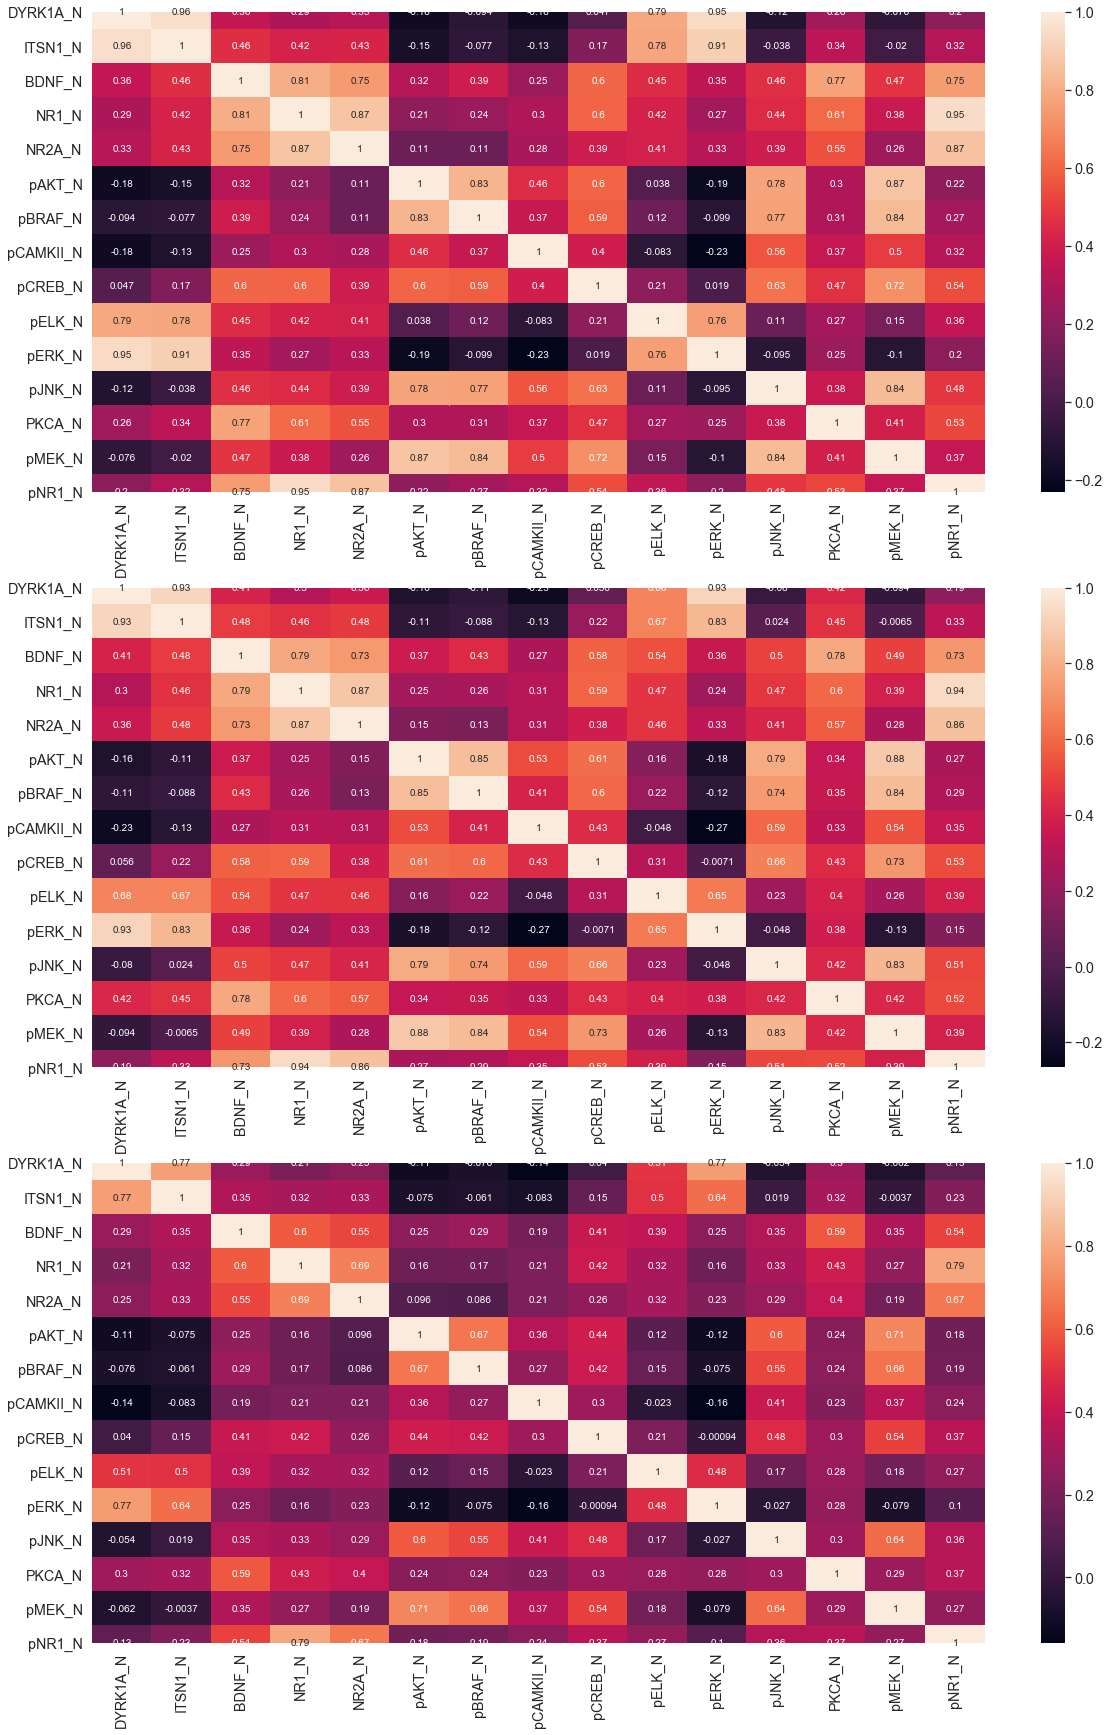

In [31]:
columns = df.columns[1:16]
data_1 = df[columns]
fig = plt.figure(figsize = (20,30))
ax = plt.subplot(3,1,1)
sns.heatmap(data_1.corr(method = 'pearson'),annot=True, ax = ax)
ax = plt.subplot(3,1,2)
sns.heatmap(data_1.corr(method = 'spearman'),annot=True, ax = ax)
ax = plt.subplot(3,1,3)
sns.heatmap(data_1.corr(method = 'kendall'), annot=True, ax=ax);

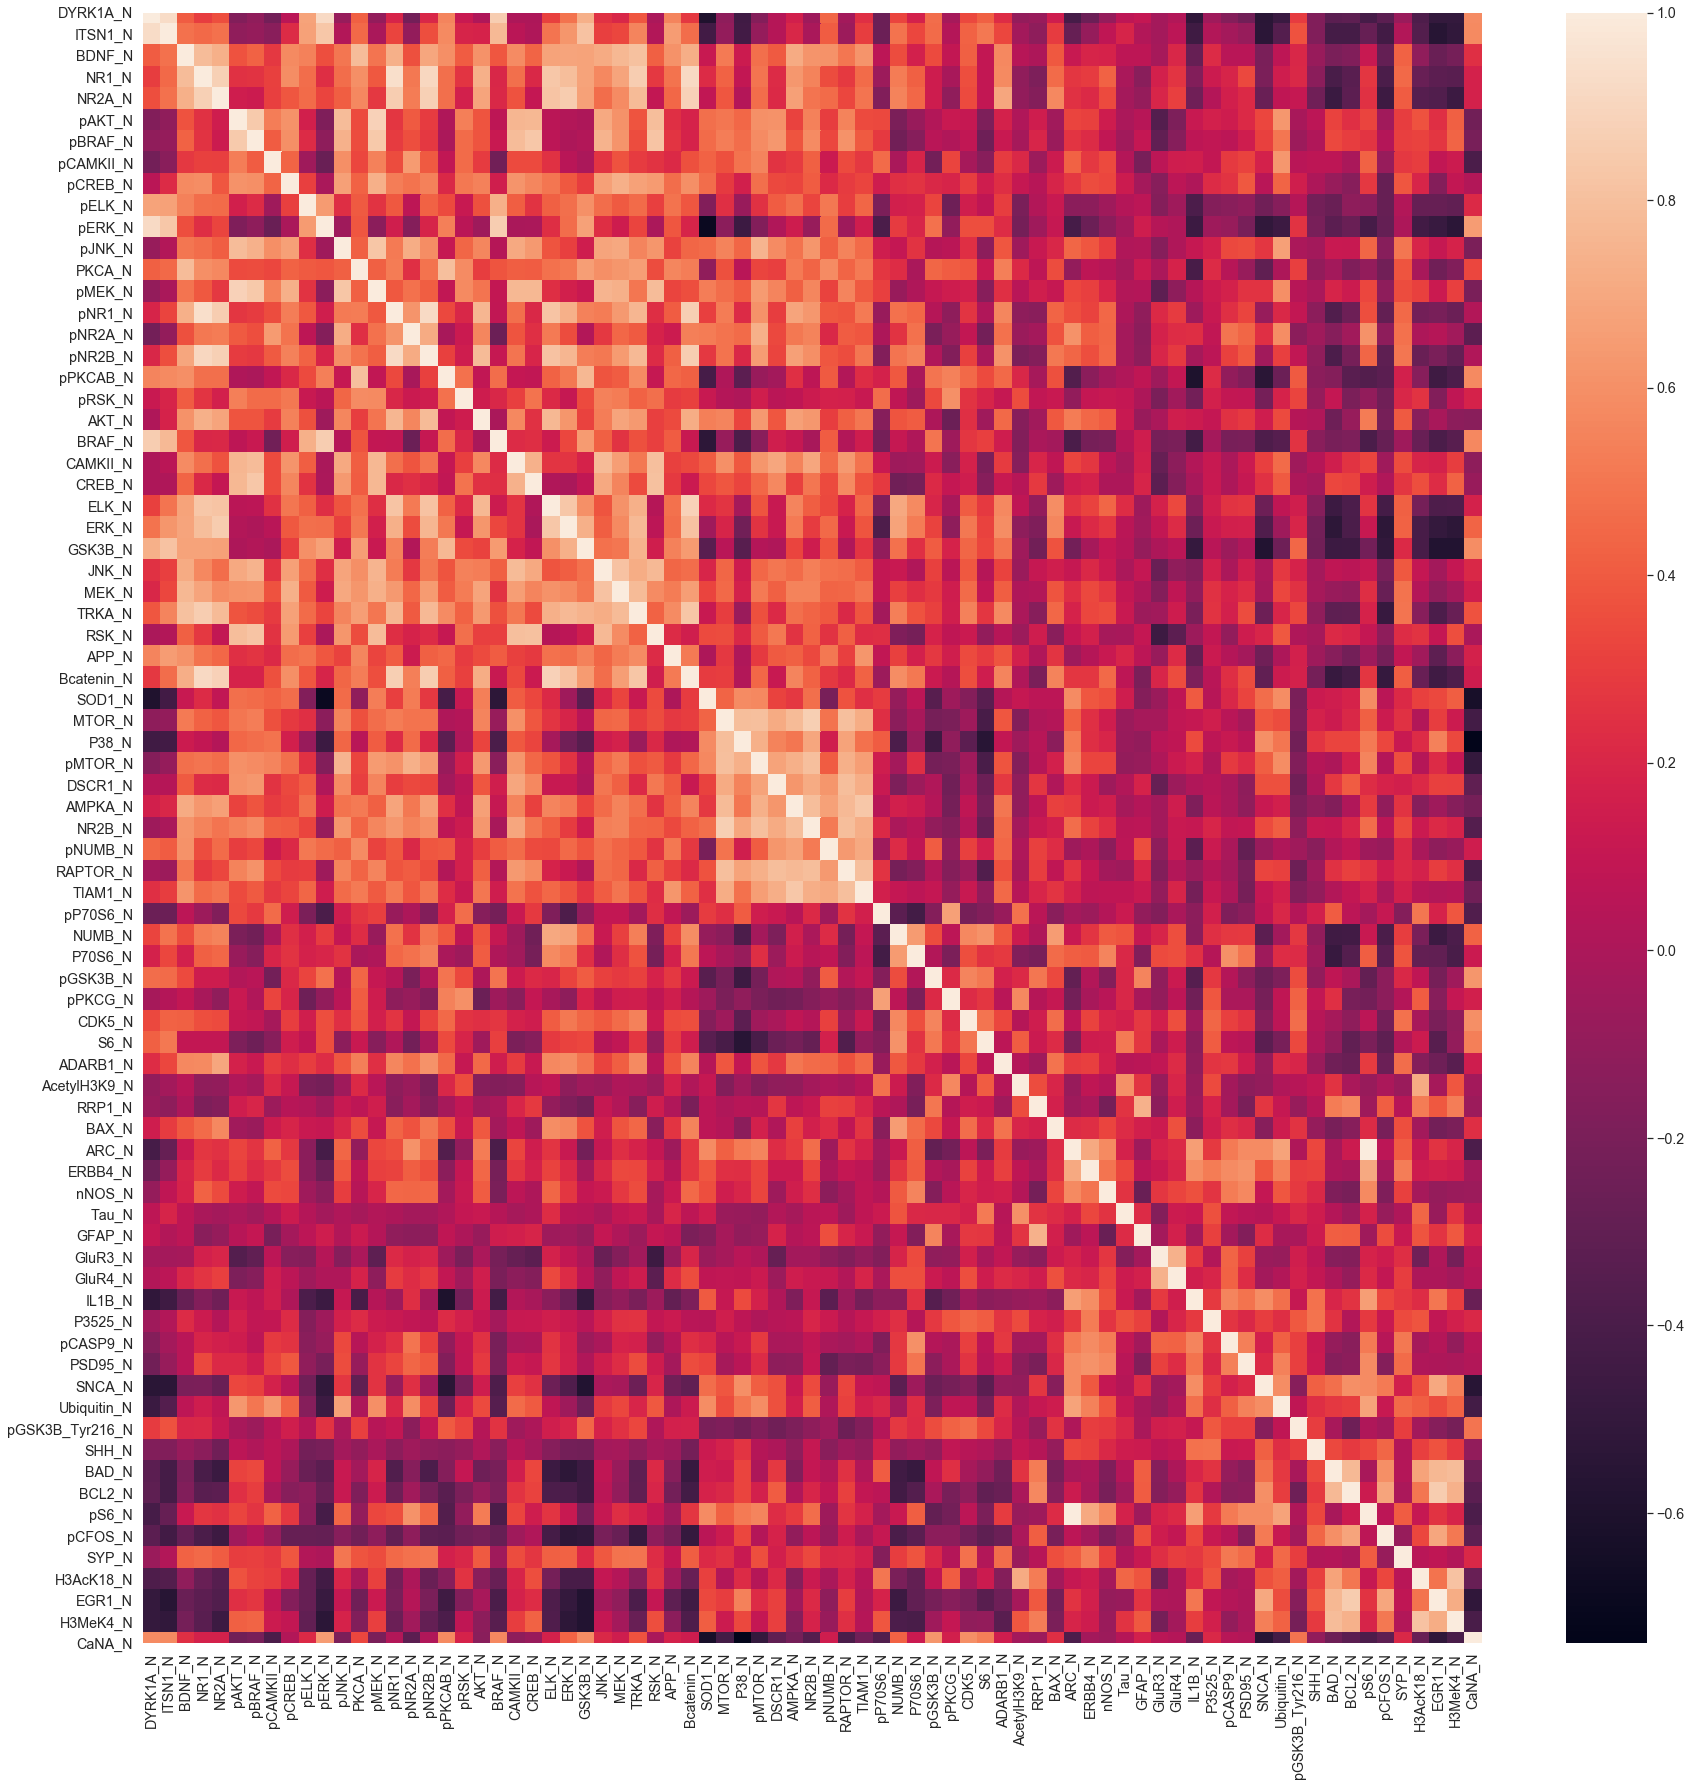

In [32]:
all_columns = df.columns[1:]
all_data = df[all_columns]
fig = plt.figure(figsize = (30,30))
ax = plt.subplot(1,1,1)
sns.heatmap(all_data.corr(method = 'spearman'))

**Вывод** Кендалл определяет зависимость хуже всего, по сравнению со Спирменом и Пирсоном. Спирмен и Пирсон показывают примерно одинаковые результаты на предоставленных данных. Четко видна корреляция между некоторыми величинами экспресии генов по результатам визуализации матриц корреляций для методов Спирмена и Пирсона. На общей матрице корреляций опять таки видна зависимость величины экспрессии генов друг от друга(у каких то зависимость больше, у каких то меньше) с помощью метода Спирмена. Примерно те же результаты касательно методов по определению корреляции получились в теоретической задаче на нахождение зависимости между двумя последовательностями.

Далее мы будем исследовать зависимость уровня экспрессии от генотипа. У нас имеется всего два генотипа: обычные мыши и мыши с синдромом Дауна.


Визуализируем двумерные проекции данных и ядерные оценки плотности отдельно по генотипам.

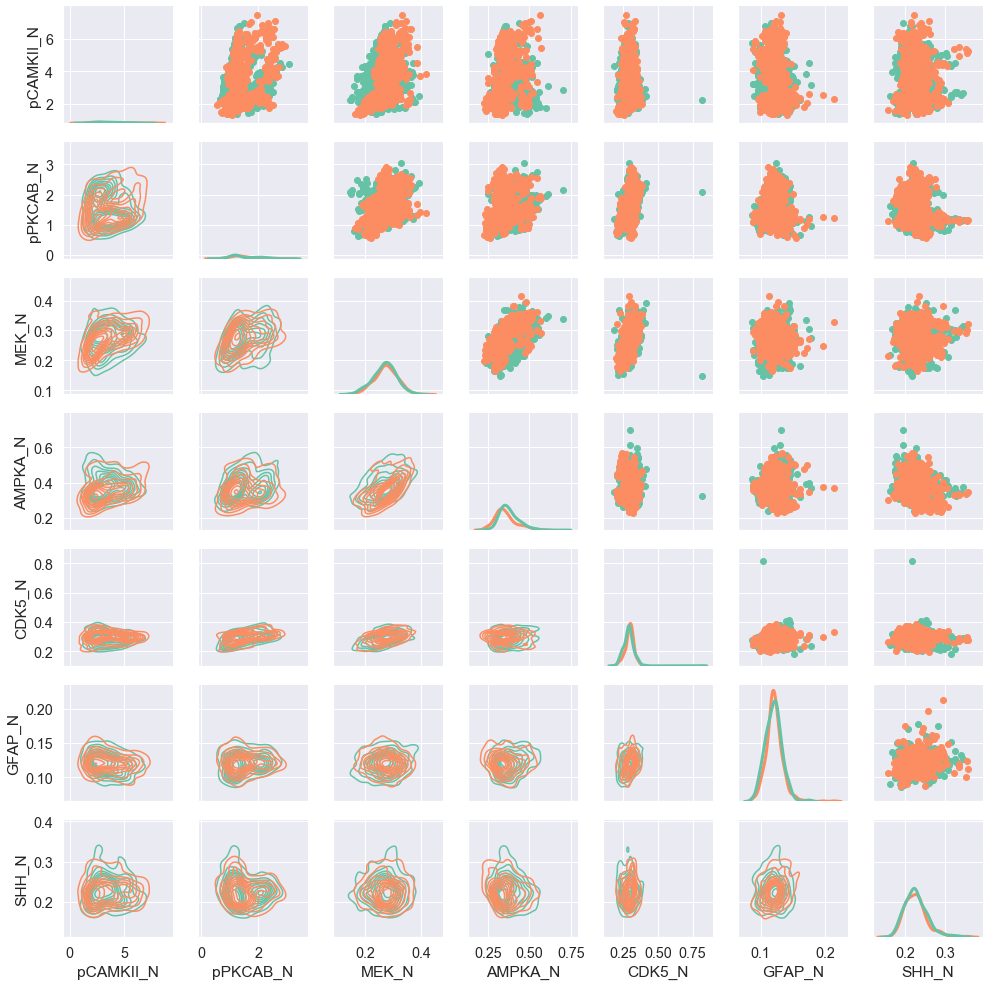

In [33]:
g = sns.PairGrid(df.iloc[:, 8:80:10], hue='Genotype', height=2)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)

##### 1.1 Влияние генотипа на экспрессию DYRK1A_N 

С помощью ядерных оценок плотности посмотрим, как отличаются распределения `DYRK1A_N` для разных генотипов.

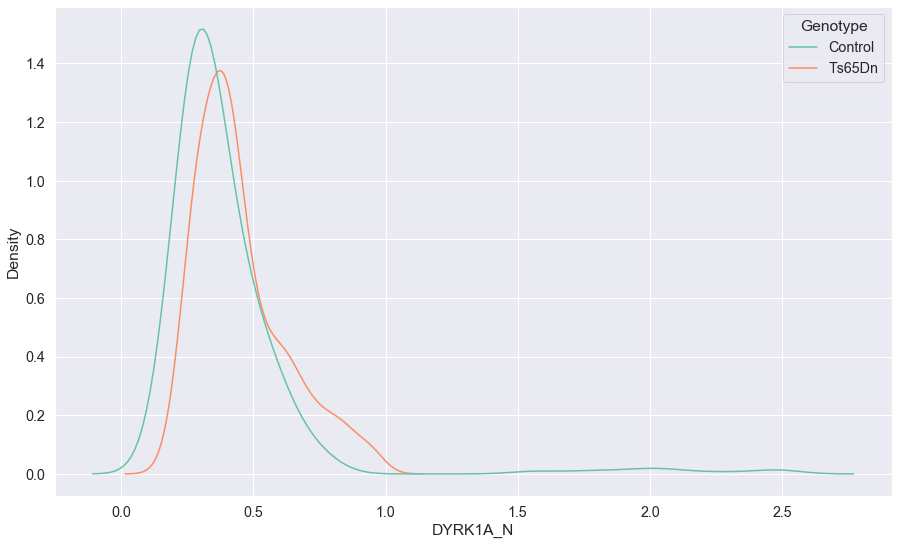

In [57]:
plt.figure(figsize = (15, 9))
sns.kdeplot(df['DYRK1A_N'], hue=df['Genotype'])

Избавимся от выбросов и `nan`. Разделим все значения на 5 корзин и составим таблицу сопряженности.

In [35]:
data_without_nan = df[['Genotype','DYRK1A_N']].dropna()
x_axis = data_without_nan['Genotype'].to_numpy() == np.array(['Control'] * len(data_without_nan))
y_axis = data_without_nan['DYRK1A_N'].to_numpy()
table = np.histogram2d(x_axis, y_axis, bins = [2,[0,0.2,0.4,0.6,0.8,1.5]])[0]

Применим критерий хи-квадрат.

In [36]:
chi_square = 0
n = data_without_nan.shape[0]
for i in range(0,2):
  for j in range(0,5):
    chi_square += (table[i][j] - sum(table[i])*sum(table[:,j])/n)**2 / (sum(table[i])*sum(table[:,j])/n)
if chi_square > sps.chi2(4).ppf(0.95):
  print('Отвергаем гипотезу')
else:
  print('Не отвергаем гипотезу')

Отвергаем гипотезу


Гипотеза о независимости была отвергнута, что в общем то и видно по построенным графикам ядерной оценки плотности. Видно,что  одна оценка смещена относительно другой.

#### Дисперсионный анализ

##### Зависимость распределения DYRK1A_N от генотипа

Проверим гипотезу о равенстве распределений с использованием критерия Уилкоксона-Манна-Уитни с использованием различных альтернатив.

In [37]:
alternatives = ['two-sided', 'less', 'greater']
for a in alternatives:
    print(sps.mannwhitneyu(df[df['Genotype'] == 'Control']['DYRK1A_N'],
                df[df['Genotype'] == 'Ts65Dn']['DYRK1A_N'], use_continuity=True, alternative=a))

MannwhitneyuResult(statistic=101725.0, pvalue=1.5303452997371036e-17)
MannwhitneyuResult(statistic=101725.0, pvalue=7.651726498685518e-18)
MannwhitneyuResult(statistic=101725.0, pvalue=1.0)


**Вывод**  Все условия использования критерия выполняются, а именно выборки достаточно большого размера (как минимум каждая из них больше 50, а значит критерий можно использовать) и являются независимыми. Критерий с достаточно большой точностью дает достоверный результат (очень маленькие значения p-value).

Посчитаем реализацию оценки сдвига, связанную со статистикой Манна-Уитни.

In [38]:
Dyrka_Control = df[df['Genotype'] == 'Control']['DYRK1A_N'].dropna().to_numpy()
Dyrka_Ts65Dn = df[df['Genotype'] == 'Ts65Dn']['DYRK1A_N'].dropna().to_numpy()
W = np.array([[Dyrka_Ts65Dn[j] - Dyrka_Control[i]   
                 for i in np.arange(len(Dyrka_Control))] for j in np.arange(len(Dyrka_Ts65Dn))]).flatten()
np.median(W)

0.0678743825

Посчитаем реализацию доверительного интервала величины сдвига. 

In [39]:
n = len(Dyrka_Control)
m = len(Dyrka_Ts65Dn)
k = math.floor(n*m/2 - 1/2 -sps.norm.ppf(0.95)*np.sqrt(n*m*(n+m+1)/12))

print('Доверительный интервал: (',np.sort(W)[k+1],',',np.sort(W)[n*m-k], ')')

Доверительный интервал: ( 0.05490137500000003 , 0.08095821799999997 )


##### Зависимость распределения  BDNF_N от генотипа


Проверим гипотезу с использованием критерия Уилкоксона-Манна-Уитни при различных альтернативах, посчитаем оценку сдвига и доверительный интервал. 

In [40]:
alternatives = ['two-sided', 'less', 'greater']
for a in alternatives:
    print(sps.mannwhitneyu(df[df['Genotype'] == 'Control']['BDNF_N'],
                df[df['Genotype'] == 'Ts65Dn']['BDNF_N'], use_continuity=True, alternative=a))

MannwhitneyuResult(statistic=152167.0, pvalue=0.18284761646679482)
MannwhitneyuResult(statistic=152167.0, pvalue=0.9086082927858418)
MannwhitneyuResult(statistic=152167.0, pvalue=0.09142380823339741)


In [41]:
Dyrka_Control = df[df['Genotype'] == 'Control']['BDNF_N'].dropna().to_numpy()
Dyrka_Ts65Dn = df[df['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna().to_numpy()
W = np.array([[Dyrka_Ts65Dn[j] - Dyrka_Control[i]   
                 for i in np.arange(len(Dyrka_Control))] for j in np.arange(len(Dyrka_Ts65Dn))]).flatten()
np.median(W)

-0.004431168499999999

In [42]:
n = len(Dyrka_Control)
m = len(Dyrka_Ts65Dn)
k = math.floor(n*m/2 - 1/2 -sps.norm.ppf(0.95)*np.sqrt(n*m*(n+m+1)/12))

print('Доверительный интервал: (',np.sort(W)[k+1],',',np.sort(W)[n*m-k], ')')

Доверительный интервал: ( -0.009274271999999972 , 0.0004146499999999609 )


**Вывод** Имеется сдвиг, об этом говорит как и критерий Манна-Уитни, так и доверительный интервал, который содержит нашу оценку.

Гипотеза отвергается, если доверительный интервал уровня доверия 95% будет содержать нашу оценку.

Проверим выборку на нормальность с помощью критерия Шапиро-Уилка и QQ-plot.

Методы, неустойчивые к отклонениям от нормальности могут дать ошибочные результаты, что в общем то и следует из их названия. 
Для использования подобных методов данные следует должным образом подготовить, избавиться от выбросов, очистить от Nan и тд.

Шапиро-Уилк:

In [43]:
print('gene:[DYRK1A_N], genotype:Control ',sps.shapiro(df[df['Genotype'] == 'Control']['DYRK1A_N'].dropna()))
print('gene:[DYRK1A_N], genotype:Ts65Dn ',sps.shapiro(df[df['Genotype'] == 'Ts65Dn']['DYRK1A_N'].dropna()))
print('gene:[BDNF_N], genotype:Control ',sps.shapiro(df[df['Genotype'] == 'Control']['BDNF_N'].dropna()))
print('gene:[BDNF_N], genotype:Ts65Dn ',sps.shapiro(df[df['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna()))

gene:[DYRK1A_N], genotype:Control  (0.5048154592514038, 5.268716760538645e-37)
gene:[DYRK1A_N], genotype:Ts65Dn  (0.9138566255569458, 2.1855134840632597e-16)
gene:[BDNF_N], genotype:Control  (0.9910038709640503, 0.001521912170574069)
gene:[BDNF_N], genotype:Ts65Dn  (0.9916948676109314, 0.006185524165630341)


QQ-plot для DYRK1A_N и различных генотипов:

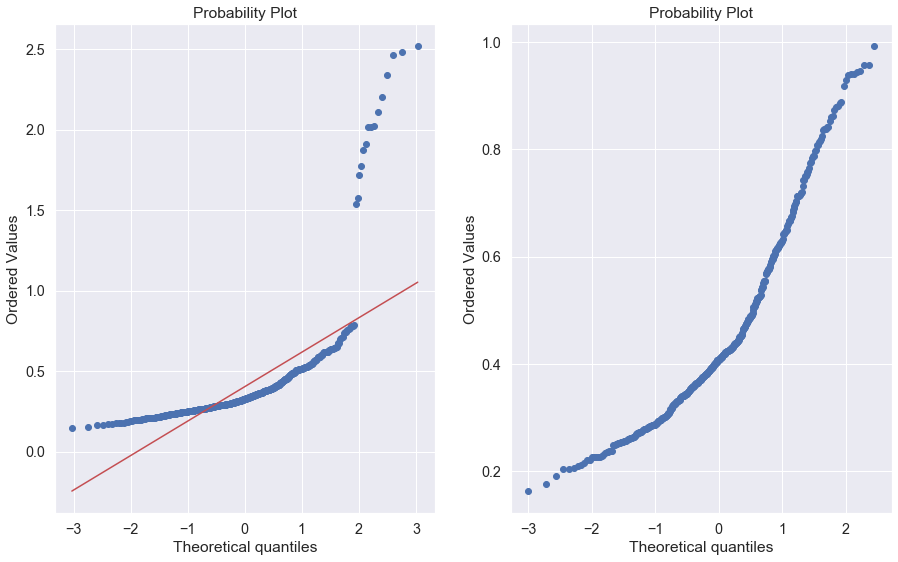

In [44]:
plt.figure(figsize = (15,9))
ax = plt.subplot(1, 2, 1)
sps.probplot(df[df['Genotype'] == 'Control']['DYRK1A_N'], plot = ax)

ax = plt.subplot(1, 2, 2)
sps.probplot(df[df['Genotype'] == 'Ts65Dn']['DYRK1A_N'], plot = ax);

QQ-plot для BDNF_N и различных генотипов:

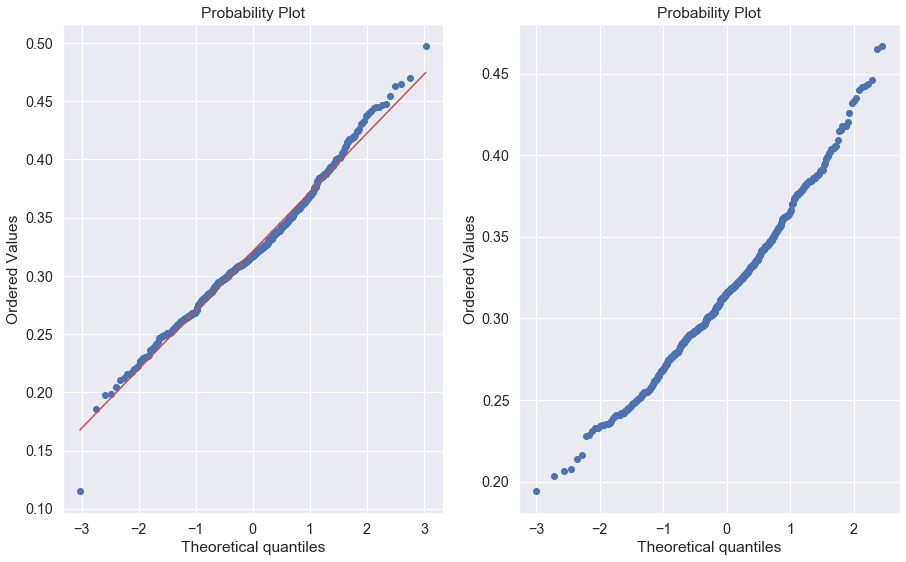

In [45]:
plt.figure(figsize = (15,9))
ax = plt.subplot(1, 2, 1)
sps.probplot(df[df['Genotype'] == 'Control']['BDNF_N'], plot = ax);
ax = plt.subplot(1, 2, 2)
sps.probplot(df[df['Genotype'] == 'Ts65Dn']['BDNF_N'], plot = ax);

Применим критерий Стьюдента:

In [46]:
sps.ttest_ind(df[df['Genotype'] == 'Control']['BDNF_N'].dropna(),
              df[df['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna(), equal_var=True)

Ttest_indResult(statistic=1.440470979622491, pvalue=0.15002536864087548)

**Вывод** Применял критерий Стьюдента, тк именно должен использоваться при одинаковых неизвестных дисперсиях. Его можно применять только если наши данные являются выборкой из нормального распределения, поэтому для DYRK1A_N этого сделать не получится. По результатам исследования получилось, что генотип влияет на распределение для DYRK1A_N, в то время как для BDNF_N такого сказать нельзя (по результатам критерия Уилкинсона-Манна-Уитни).